###SVM - Classification

**Concept** :
* A Support Vector Machine (SVM) can be imagined as a surface that creates a boundary between points of data plotted in multidimensional space that represent examples and their feature values. 

* The goal of a SVM is to create a flat boundary called a hyperplane, which divides the space to create fairly homogeneous partitions on either side. 

* In this way, the SVM learning combines aspects of both the instance-based nearest neighbor learning and the linear regression modeling . The combination is extremely powerful, allowing SVMs to model highly complex relationships.

* The hyperplane is a flat surface in a high-dimensional space—a concept that can be difficult to get your mind around

* When multiple ways of division are possible the Maximum Margin Hyperplane (MMH) that creates the greatest separation between the two classes is chosen. It is the hyperplane that leads to the greatest separation as it will generalize the best to the future data. The maximum margin will improve the chance that, in spite of random noise, the points will remain on the correct side of the boundary.

* The support vectors are the points from each class that are the closest to the MMH; each class must have at least one support vector, but it is possible to have more than one. 

* Using the support vectors alone, it is possible to define the MMH. This is a key feature of SVMs; the support vectors provide a very compact way to store a classification model, even if the number of features is extremely large.

---------

**Parameters**

* **The C parameter**  tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.  

* **Kernel** parameter selects the type of hyperplane used to separate the data. Using ‘linear’ will use a linear hyperplane (a line in the case of 2D data). ‘rbf’ and ‘poly’ uses a non linear hyper-plane.

* In machine learning, the radial basis function kernel, or **RBF** kernel, is a popular kernel function used in various kernelized learning algorithms. In particular, it is commonly used in support vector machine classification

* **Gamma** is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set

* **Degree** is a parameter used when kernel is set to ‘poly’. It’s basically the degree of the polynomial used to find the hyperplane to split the data.

* Learn more at https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769



---



**Standard applications**
* Classification of microarray gene expression data in the field of bioinformatics to identify cancer or other genetic diseases

* Text categorization such as identification of the language used in a document or the classification of documents by subject matter

* The detection of rare yet important events like combustion engine failure, security breaches, or earthquakes

* SVMs are most easily understood when used for binary classification, which is how the method has been traditionally applied.

**Strengths**
* Can be used for classification or numeric prediction problems

* Not overly influenced by noisy data and not very prone to overfitting
* May be easier to use than neural networks, particularly due to the existence of several well-supported SVM algorithms

* Gaining popularity due to its high accuracy and high-profile wins in data mining competitions

**Weaknesses**
* Finding the best model requires testing of various combinations of kernels and model parameters

* Can be slow to train, particularly if the input dataset has a large number of features or examples

* Results in a complex black box model that is difficult, if not impossible, to interpret


In [8]:
# Support vector machines - for binary classification

#The two datasets are related to red and white variants of the Portuguese 
# "Vinho Verde" wine. 
#These datasets can be viewed as classification or regression tasks. 
#The classes are ordered and not balanced (e.g. there are much more normal wines 
#than excellent or poor ones).

#This dataset is also available from the UCI machine learning repository, 
#https://archive.ics.uci.edu/ml/datasets/wine+quality
#https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

#Reading Data
df = pd.read_csv('winequality-red.csv')

#gain some info about dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [2]:
#see the first 5 row of the dataset
print(df.head())

#getting information about mean,count,std and quartiles of columns
print(df.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

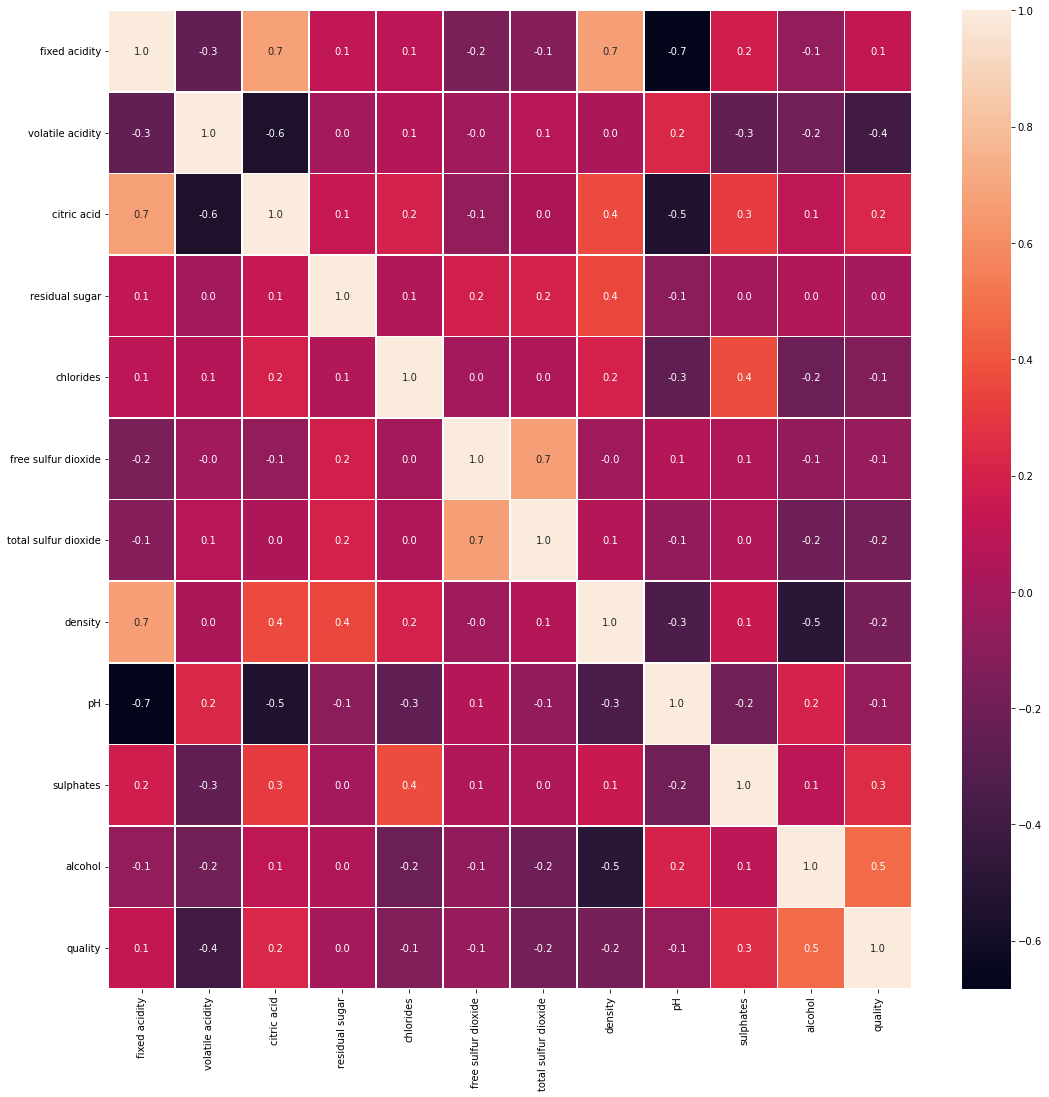

In [4]:
#correlation map to see correlation between variables
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

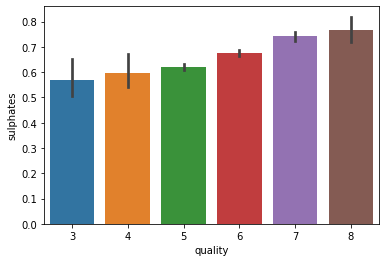

In [ ]:
#quality vs sulphates
sns.barplot(x='quality', y='sulphates',data=df)

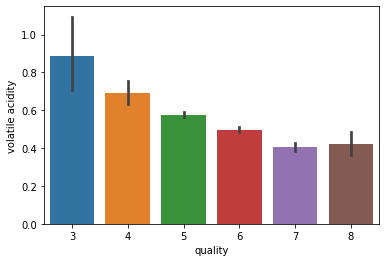

In [ ]:
#quality vs volatile acidity
sns.barplot(x = 'quality', y='volatile acidity', data = df)

In [ ]:
#showing counts before categorize quality column
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
#categorize wine quality
# Ignore running this cell to have multi-class classification instead of binary
bins = (2,6.5,8)
group_names = ['bad','good']
categories = pd.cut(df['quality'], bins, labels = group_names)
df['quality'] = categories

#after categorize
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [11]:
#splitting data to X ve y
X = df.drop(['quality'], axis = 1)
y = df['quality']

print(y[30:40])

# Encoding our dependent variable:Quality column
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

print(y[30:40])

# Splitting the dataset into the Training set and Test set.%20 of dataset for test set,%80 for training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 0)

print(X_train[0:2])
# Feature Scaling to X_train and X_test to classify better.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train[0:2])

# Fitting Kernel SVM to the Training set - try both lines below 
# and observe different accuracy levels
#classifier = SVC(kernel = 'rbf', random_state = 0)
classifier = SVC(kernel = 'rbf', random_state = 0, gamma=0.9)
classifier.fit(X_train, y_train)
#Predicting the Test Set
y_pred = classifier.predict(X_test)

#making confusing matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix is:")
print(cm)

from sklearn import metrics
# Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

30    5
31    6
32    5
33    6
34    5
35    6
36    6
37    7
38    4
39    5
Name: quality, dtype: int64
[2 3 2 3 2 3 3 4 1 2]
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
642            9.9              0.54         0.45             2.3      0.071   
679           10.8              0.26         0.45             3.3      0.060   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
642                 16.0                  40.0   0.9991  3.39       0.62   
679                 20.0                  49.0   0.9972  3.13       0.54   

     alcohol  
642      9.4  
679      9.6  
[[ 0.90103398  0.05480282  0.9094138  -0.17435942 -0.33535907 -0.00312244
  -0.21191313  1.24489524  0.52091013 -0.22358408 -0.95579434]
 [ 1.41998736 -1.47967601  0.9094138   0.5143549  -0.56556969  0.37722035
   0.0561748   0.23517933 -1.16841553 -0.68130963 -0.76727388]]
Confusion matrix is:
[[ 0  2  0  0  0  0]
 [ 0  4  3  2  2  0]
 [ 0  9 89 34  3 